In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as sm
%matplotlib inline

cases = pd.read_csv('nassCD.csv')

## data preprocessing tasks

In [2]:
cases.head(3)

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1


In [3]:
df = cases[['weight','dead','airbag','seatbelt','frontal','ageOFocc','yearVeh','abcat','occRole','injSeverity']]
df.head(3)

,weight,dead,airbag,seatbelt,frontal,ageOFocc,yearVeh,abcat,occRole,injSeverity
0,25.069,alive,none,belted,1,26,1990.0,unavail,driver,3.0
1,25.069,alive,airbag,belted,1,72,1995.0,deploy,driver,1.0
2,32.379,alive,none,none,1,69,1988.0,unavail,driver,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       26217 non-null  float64
 1   dead         26217 non-null  object 
 2   airbag       26217 non-null  object 
 3   seatbelt     26217 non-null  object 
 4   frontal      26217 non-null  int64  
 5   ageOFocc     26217 non-null  int64  
 6   yearVeh      26216 non-null  float64
 7   abcat        26217 non-null  object 
 8   occRole      26217 non-null  object 
 9   injSeverity  26064 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
ageOFocc         0
yearVeh          1
abcat            0
occRole          0
injSeverity    153
dtype: int64

In [6]:
df.describe()

,weight,frontal,ageOFocc,yearVeh,injSeverity
count,26217.000000,26217.000000,26217.000000,26216.000000,26064.000000
mean,462.811611,0.643323,37.206202,1992.804699,1.715508
std,1524.844430,0.479027,17.909317,5.594990,1.293357
min,0.000000,0.000000,16.000000,1953.000000,0.000000
25%,32.467000,0.000000,22.000000,1989.000000,1.000000
50%,86.986000,1.000000,33.000000,1994.000000,2.000000
75%,364.717000,1.000000,48.000000,1997.000000,3.000000
max,57871.595000,1.000000,97.000000,2003.000000,6.000000


In [7]:
df = df.drop(df[df['weight'] > 14200].index)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
ageOFocc       0
yearVeh        0
abcat          0
occRole        0
injSeverity    0
dtype: int64

In [10]:
df = pd.get_dummies(df, columns = ['dead'])
df = pd.get_dummies(df, columns = ['airbag'])
df = pd.get_dummies(df, columns = ['seatbelt'])
df = pd.get_dummies(df, columns = ['occRole'])
df = pd.get_dummies(df, columns = ['abcat'])


df.drop('dead_dead', axis=1, inplace=True)
df.drop('airbag_none', axis=1, inplace=True)
df.drop('seatbelt_none', axis=1, inplace=True)
df.drop('occRole_pass', axis=1, inplace=True)
df.head(3)

,weight,frontal,ageOFocc,yearVeh,injSeverity,dead_alive,airbag_airbag,seatbelt_belted,occRole_driver,abcat_deploy,abcat_nodeploy,abcat_unavail
0,25.069,1,26,1990.0,3.0,1,0,1,1,0,0,1
1,25.069,1,72,1995.0,1.0,1,1,1,1,1,0,0
2,32.379,1,69,1988.0,4.0,1,0,0,1,0,0,1


In [11]:
df.rename({'dead_alive':'survived','ageOFocc':'age','seatbelt_belted':'seatbelt', 'occRole_driver':'occRole','airbag_airbag':'airbag'},axis=1, inplace=True)
df.head(3)

,weight,frontal,age,yearVeh,injSeverity,survived,airbag,seatbelt,occRole,abcat_deploy,abcat_nodeploy,abcat_unavail
0,25.069,1,26,1990.0,3.0,1,0,1,1,0,0,1
1,25.069,1,72,1995.0,1.0,1,1,1,1,1,0,0
2,32.379,1,69,1988.0,4.0,1,0,0,1,0,0,1


In [12]:
df = df.astype(int)

### Standardize data

In [13]:
scaler = StandardScaler()


scaler.fit(df.drop('survived', axis=1))

scaled_features = scaler.transform(df.drop('survived',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(3)

,weight,frontal,age,yearVeh,injSeverity,survived,airbag,seatbelt,occRole,abcat_deploy,abcat_nodeploy
0,-0.391370,0.744108,-0.627604,-0.500992,0.991155,-1.105636,0.642361,0.518294,-0.714893,-0.518413,1.105636
1,-0.391370,0.744108,1.941370,0.392757,-0.556057,0.904457,0.642361,0.518294,1.398810,-0.518413,-0.904457
2,-0.384233,0.744108,1.773828,-0.858492,1.764761,-1.105636,-1.556757,0.518294,-0.714893,-0.518413,1.105636


### Exploratory data analysis

<AxesSubplot:>

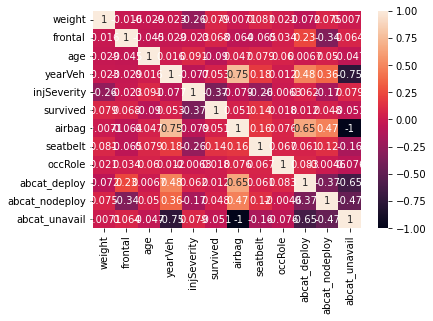

In [14]:
sns.heatmap(df.corr(), annot=True)

### Train model

In [15]:
from sklearn.model_selection import train_test_split
X = df[['weight','frontal','yearVeh','injSeverity','age','seatbelt','airbag','occRole','abcat_deploy','abcat_nodeploy']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000)

In [16]:
importances = pd.DataFrame(rfc.feature_importances_.reshape(1,10), columns=X_train.columns)

print(np.max(importances).sort_values())

importances.head()

abcat_nodeploy    0.001891
airbag            0.002480
abcat_deploy      0.002632
occRole           0.005389
frontal           0.006353
seatbelt          0.012438
yearVeh           0.029761
age               0.054167
weight            0.071731
injSeverity       0.813159
dtype: float64


,weight,frontal,yearVeh,injSeverity,age,seatbelt,airbag,occRole,abcat_deploy,abcat_nodeploy
0,0.071731,0.006353,0.029761,0.813159,0.054167,0.012438,0.00248,0.005389,0.002632,0.001891


Text(0.5, 1.0, 'importance of each column')

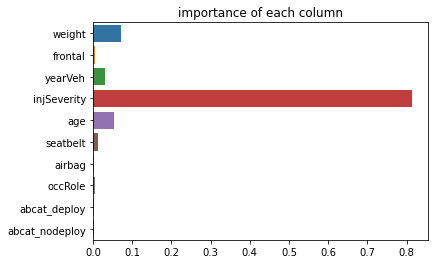

In [17]:
importances = pd.Series(data=rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('importance of each column')

### Forcasting

In [18]:
rfc_pred = rfc.predict(X_test)

### Results

 

In [19]:
print(classification_report(y_test,rfc_pred))
print("__________________________________________________________")

print("Confusion matrix")
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       318
           1       1.00      1.00      1.00      7482

    accuracy                           1.00      7800
   macro avg       0.99      0.96      0.97      7800
weighted avg       1.00      1.00      1.00      7800

__________________________________________________________
Confusion matrix
[[ 293   25]
 [   6 7476]]
